# Support Vector Machines

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

# Load Data


In [9]:
df = pd.read_csv('/Users/hannah-ann/PycharmProjects/cosmetic-ingredient-classifier-app/data/cleaned/cleaned_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ingredients  763 non-null    object
 1   Combination  763 non-null    int64 
 2   Dry          763 non-null    int64 
 3   Normal       763 non-null    int64 
 4   Oily         763 non-null    int64 
 5   Sensitive    763 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 35.9+ KB


# Prepare Data

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Ingredients'])
y = df[['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]

# Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Train

In [12]:
model = svm.SVC(kernel='rbf', gamma='scale', C=1.0)

y_train_update = np.argmax(y_train, axis=1)
y_test_fixed = np.argmax(y_test, axis=1)
model.fit(X_train, y_train_update)

SVC()

In [13]:
model.score(X_test, y_test_fixed)


0.9869281045751634

# Evaluate

Accuracy: 0.9869281045751634
Precision: 0.9740270836003248
Recall: 0.9869281045751634


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: Invalid shape (2, 2, 2) for image data

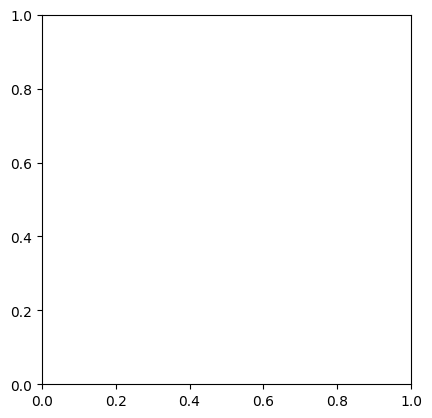

In [15]:
from sklearn.metrics import precision_score, recall_score ,multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_fixed, y_pred,normalize=True)
print(f"Accuracy: {accuracy}")

# Calculate the precision of the model
precision = precision_score(y_test_fixed, y_pred,average='weighted')
print(f"Precision: {precision}")

# Calculate to recall fo the model07986r-00-
recall = recall_score(y_test_fixed, y_pred,average='micro')
print(f"Recall: {recall}")


# multi label confusion matrix
confusion_matrix = multilabel_confusion_matrix(y_test_fixed, y_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.gca().invert_yaxis()
plt.show()


report = classification_report(y_test_fixed, y_pred,zero_division=0
,labels=[0,1,2,3,4],target_names=['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'])
print(report)
